# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseMetadata = pd.read_csv(mouse_metadata_path)
studyResults = pd.read_csv(study_results_path)

In [2]:
mouseMetadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
studyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#In order to see duplicate values, we must convert the Mouse ID to a string
studyResults['Mouse ID']=studyResults['Mouse ID'].astype('string')
studyResults.dtypes

Mouse ID               string
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
studyResults['Mouse ID'].nunique()

249

In [6]:
#Checking for values that are duplicated in Mouse ID column and Timepoint column. 
studyResultsDuplicates=studyResults.duplicated()

# Printing the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated=studyResults[studyResults.duplicated()]
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyResults=studyResults.loc[studyResults['Mouse ID']!='g989']

In [8]:
# Combine the data into a single dataset
combinedDf=pd.merge(mouseMetadata, studyResults, on='Mouse ID')
# Display the data table for preview
combinedDf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
numMice=combinedDf['Mouse ID'].nunique()
numMice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugRegimenGroup=combinedDf.groupby('Drug Regimen')

mean=drugRegimenGroup['Tumor Volume (mm3)'].mean()
median=drugRegimenGroup['Tumor Volume (mm3)'].median()
variance=drugRegimenGroup['Tumor Volume (mm3)'].var()
stdDev=drugRegimenGroup['Tumor Volume (mm3)'].std()
sem=drugRegimenGroup['Tumor Volume (mm3)'].sem()

In [11]:
# Assemble the resulting series into a single summary dataframe.
summaryDf=pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance':variance, 'Tumor Volume Std. Dev':stdDev, 'Tumor Volume Std. Err':sem})
summaryDf



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregatedRegimen=drugRegimenGroup.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

# Using the aggregation method, produce the same summary statistics in a single line
aggregatedRegimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

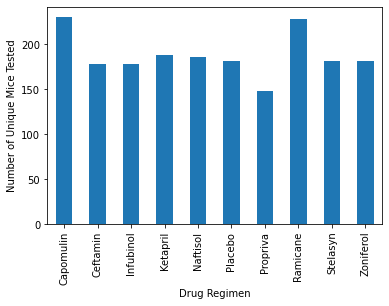

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
numMeasurementsBar=(drugRegimenGroup['Mouse ID'].count()).plot(kind='bar', ylabel="Number of Unique Mice Tested")

Text(0.5, 0, 'Drug Regimen')

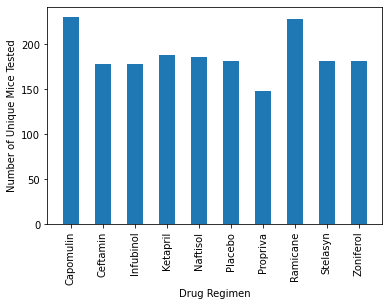

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

#Generate tick names
tickNames=[name for name in summaryDf.axes[0]]

#Generate a range for our tick marks
xAxis=np.arange(len(tickNames))

#Create bar graph that counts Mouse ID as number of measurements
plt.bar(xAxis, height=drugRegimenGroup['Mouse ID'].count(), width=0.5)

#Configure tick names and graph labels
plt.xticks(xAxis,tickNames, rotation=90)

plt.ylabel('Number of Unique Mice Tested')

plt.xlabel('Drug Regimen')

<AxesSubplot:ylabel='Mouse ID'>

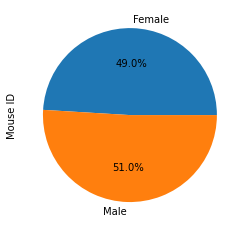

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGroup=combinedDf.groupby('Sex')
mouseGroup['Mouse ID'].count().plot(kind='pie', y='Sex', autopct='%1.1f%%')

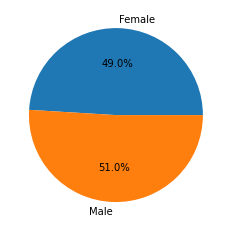

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=[(mouseGroup['Mouse ID'].count())[0], (mouseGroup['Mouse ID'].count())[1]]
labels=['Female', 'Male']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Filter data frame for just four drugs listed
fourTreatmentsDf=combinedDf.loc[(combinedDf['Drug Regimen']=='Capomulin')|(combinedDf['Drug Regimen']=='Ramicane')|(combinedDf['Drug Regimen']=='Infubinol')|(combinedDf['Drug Regimen']=='Ceftamin')]
fourTreatmentsDf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2
1856,z581,Infubinol,Female,24,25,30,56.286750,2
1857,z581,Infubinol,Female,24,25,35,58.628399,3
1858,z581,Infubinol,Female,24,25,40,60.053740,3


In [30]:
#Group by Mouse ID and Drug Regimen

mouseIDGroup=fourTreatmentsDf.groupby(['Mouse ID', 'Drug Regimen'])
maxTimeDf=mouseIDGroup.agg({'Timepoint':'max'})


# Start by getting the last (greatest) timepoint for each mouse


# #Make this into a dataframe so it is mergable with the other data frame
maxTimeDf=maxTimeDf.rename(columns={'Timepoint':'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newDf=pd.merge(fourTreatmentsDf, maxTimeDf, on='Mouse ID')
newDf

#Filter for rows in which the Timepoint is equal to the max time point and return the tumor volume and mouse ID

finalVolume=newDf.loc[newDf['Timepoint']==newDf['Max Timepoint'], ['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#Rename column to Final Tumor Volume
finalVolume=finalVolume.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume'})
finalVolume

,Mouse ID,Drug Regimen,Final Tumor Volume
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
773,x822,Ceftamin,61.386660
783,y163,Infubinol,67.685569
793,y769,Ceftamin,68.594745
803,y865,Ceftamin,64.729837


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Use list comprehension to get value for every final tumor volume in dataframe
# tumorVolList = [value for value in finalVolume['Final Tumor Volume']]
tumorVolList=[]

In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for drug in treatmentList:
    
    tumorVolList=finalVolume.loc[finalVolume['Drug Regimen']==f'{drug}', 'Final Tumor Volume'].tolist()

    quartiles=np.quantile(tumorVolList,[0.25, 0.5, 0.75])

    lowerQ=quartiles[0]
    upperQ=quartiles[2]
    iqr=upperQ-lowerQ

    lowerBound=lowerQ-(1.5*iqr)
    upperBound=upperQ+(1.5*iqr)
    
    outliers=[number for number in tumorVolList if number<lowerBound or number>upperBound ]

    print(f"{drug}'s potential outliers: {outliers}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.321345799999996]
Ceftamin's potential outliers: []


Text(0.5, 0.98, '')

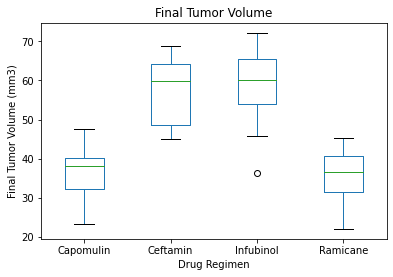

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot=finalVolume.boxplot(column='Final Tumor Volume',by='Drug Regimen', grid=False)
plt.ylabel('Final Tumor Volume (mm3)')
plt.suptitle('')

## Line and Scatter Plots

Text(0.5, 0.98, 'Capomulin Treatment of l509')

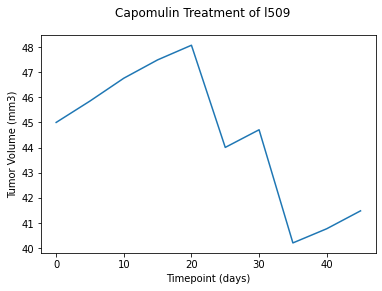

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse='l509'

tumorVolume=fourTreatmentsDf.loc[(fourTreatmentsDf['Drug Regimen']=='Capomulin')&(fourTreatmentsDf['Mouse ID']==mouse), ['Timepoint','Tumor Volume (mm3)']]

fig, ax=plt.subplots()

ax.plot(tumorVolume['Timepoint'], tumorVolume['Tumor Volume (mm3)'])
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm3)')
fig.suptitle(f'Capomulin Treatment of {mouse}')

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouseWeight=fourTreatmentsDf.loc[fourTreatmentsDf['Drug Regimen']=='Capomulin', ['Weight (g)', 'Tumor Volume (mm3)']]

fig1, ax1 = plt.subplots()
ax1.plot(kind='scatter', mouseWeight['Weight'], mouseWeight['Tumor Volume (mm3)'])

SyntaxError: positional argument follows keyword argument (<ipython-input-51-2d9b2f8f79e3>, line 6)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


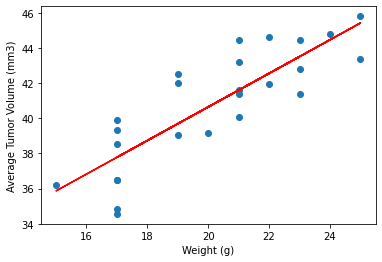

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen